In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import xgboost as xgb
from sklearn.impute import KNNImputer, SimpleImputer


In [7]:
train_df_original = pd.read_csv("/Users/heba/Desktop/Erdos/Training Dataset A_R-384891_Candidate Attach #1_PresSE_SRF #1142.csv")
test_df_original = pd.read_csv("/Users/heba/Desktop/Erdos/Evaluation Dataset B_R-384891_Candidate Attach #2_PresSE_SRF #1142.csv")
# Create copies for processing
train_df = train_df_original.copy()
test_df = test_df_original.copy()

In [8]:
train_df.head()

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,clntr9437_a,clact9429_a,clall5010_a,clall2434_a,cloil0214_a,cltra4405_a,clact9428_a,bad_flag,Gender,Race
0,581.0,0,32115.0,NEW,15.29,105.30,72.0,72.0,3.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,White
1,707.0,1,21436.0,USED,4.63,102.12,100.0,84.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Male,White
2,689.0,0,26930.0,USED,6.61,109.24,76.0,13.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Undefined,White
3,811.0,1,18140.0,USED,3.08,49.03,12.0,12.0,0.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,Other
4,631.0,0,9874.0,USED,2.62,140.56,NaN,NaN,0.0,NaN,...,7.0,21.0,NaN,NaN,NaN,NaN,5.0,0.0,Male,White


In [9]:
test_df.head()

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,clntr9437_a,clact9429_a,clall5010_a,clall2434_a,cloil0214_a,cltra4405_a,clact9428_a,bad_flag,Gender,Race
0,681.0,1,30966.0,USED,4.74,91.96,85.0,70.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Undefined,White
1,626.0,0,18363.0,USED,3.37,87.90,NaN,NaN,0.0,85.0,...,3.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,Female,White
2,776.0,1,50768.0,NEW,3.86,107.87,22.0,18.0,0.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,Hispanic
3,721.0,1,49657.0,NEW,3.71,99.36,93.0,83.0,0.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Male,White
4,NaN,0,14412.0,USED,7.94,111.50,42.0,20.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,White


In [10]:
# Display basic info
def data_overview(df, name):
    print(f"\n{name} Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print(((df.isnull().sum()/len(df))*100).round(2))
    print("\nDuplicate Rows:", df.duplicated().sum())
    print("\nBasic Statistics:")
    print(df.describe())

data_overview(train_df, "Training")
data_overview(test_df, "Testing")


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21606 entries, 0 to 21605
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fico                              21431 non-null  float64
 1   aprv_flag                         21606 non-null  int64  
 2   amtfinanced_1req                  21606 non-null  float64
 3   collateral_dlrinput_newused_1req  21606 non-null  object 
 4   pti_1req                          21603 non-null  float64
 5   ltv_1req                          21601 non-null  float64
 6   p12_reh7120_a                     19694 non-null  float64
 7   p12_bcx7110_a                     17917 non-null  float64
 8   p12_all7170_a                     20943 non-null  float64
 9   p12_aut7110_a                     11070 non-null  float64
 10  p12_all7120_a                     21226 non-null  float64
 11  p12_all7937_a                     21522 non

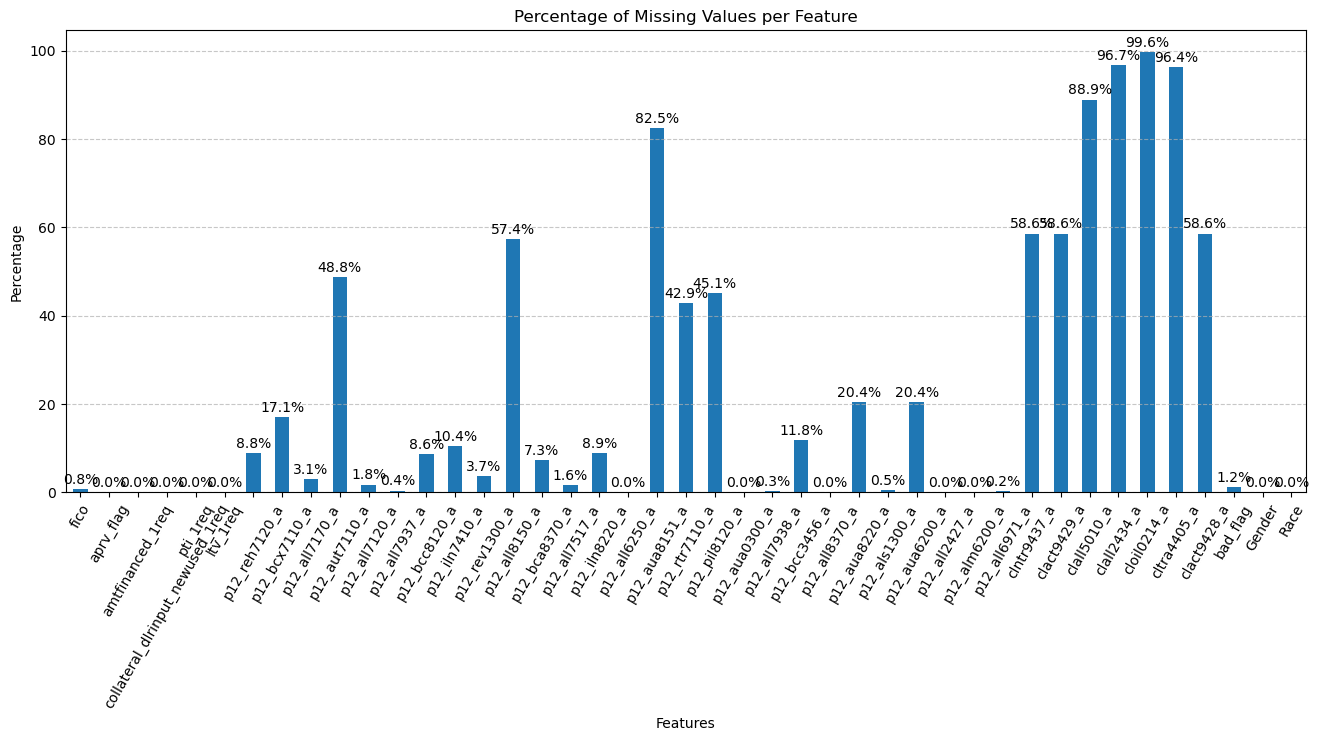

In [11]:
# Plot the percentage of the missing data
missing_percent = ((train_df.isnull().sum()/len(train_df))*100).round(2)
plt.figure(figsize=(16, 6))
missing_percent.plot(kind='bar')
plt.title('Percentage of Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with percentage
for i, v in enumerate(missing_percent):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)
plt.show()

In [12]:
#Dropping columns that have more than 80% of missing data
high_missing_columns = missing_percent[missing_percent > 80].index.tolist()
print(high_missing_columns)

['p12_aua8151_a', 'clall5010_a', 'clall2434_a', 'cloil0214_a', 'cltra4405_a']


In [13]:
#train_df.drop(columns=high_missing_columns, inplace=True)

In [14]:
train_df1 = train_df.loc[:,missing_percent<=80]
train_df1.head()

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,p12_aua6200_a,p12_all2427_a,p12_alm6200_a,p12_all6971_a,clntr9437_a,clact9429_a,clact9428_a,bad_flag,Gender,Race
0,581.0,0,32115.0,NEW,15.29,105.30,72.0,72.0,3.0,84.0,...,1.0,0,400,400.0,NaN,NaN,NaN,0.0,Female,White
1,707.0,1,21436.0,USED,4.63,102.12,100.0,84.0,0.0,NaN,...,NaN,0,1,1.0,NaN,NaN,NaN,0.0,Male,White
2,689.0,0,26930.0,USED,6.61,109.24,76.0,13.0,0.0,NaN,...,NaN,0,90,1.0,NaN,NaN,NaN,0.0,Undefined,White
3,811.0,1,18140.0,USED,3.08,49.03,12.0,12.0,0.0,34.0,...,1.0,0,1,1.0,NaN,NaN,NaN,0.0,Female,Other
4,631.0,0,9874.0,USED,2.62,140.56,NaN,NaN,0.0,NaN,...,400.0,0,400,90.0,7.0,21.0,5.0,0.0,Male,White


In [15]:
train_df1.shape

(21606, 38)

In [16]:
train_df1['Gender'].unique() #There are two genders: Females and Males, in addition to some undefined.

array(['Female', 'Male', 'Undefined'], dtype=object)

In [17]:
train_df1['Race'].unique() #There are several races: Hispanic, White, Black, Asian, in addition to some others.

array(['White', 'Other', 'Hispanic', 'Black', 'Asian'], dtype=object)

In [18]:
train_df1['collateral_dlrinput_newused_1req'].unique() #There are two types of vehicles: New and used.

array(['NEW', 'USED'], dtype=object)

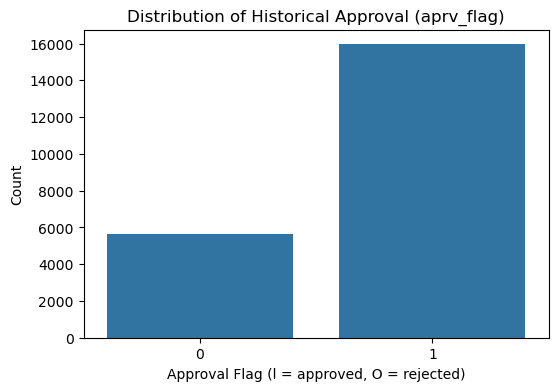

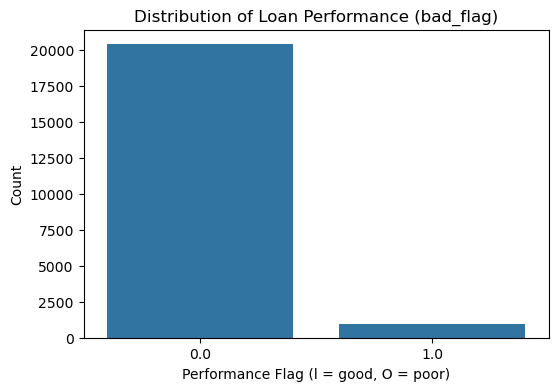

In [19]:
# Distribution of approval decisions
plt.figure(figsize=(6,4))
sns.countplot(x='aprv_flag', data=train_df1)
plt.title('Distribution of Historical Approval (aprv_flag)')
plt.xlabel('Approval Flag (l = approved, O = rejected)')
plt.ylabel('Count')
plt.show()

# Distribution of loan performance
plt.figure(figsize=(6,4))
sns.countplot(x='bad_flag', data=train_df1)
plt.title('Distribution of Loan Performance (bad_flag)')
plt.xlabel('Performance Flag (l = good, O = poor)')
plt.ylabel('Count')
plt.show()


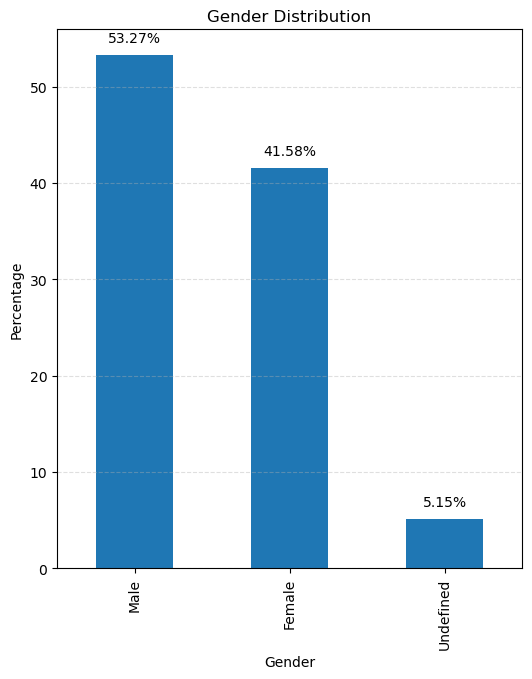

In [20]:
# Distribution of the gender as a percentage
gender_counts= train_df1['Gender'].value_counts()
gender_percent = (gender_counts/gender_counts.sum())*100
plt.figure(figsize=(6,7))
gender_percent.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle= '--', alpha=0.4)

# Annotate each bar with number
for i, perc in enumerate(gender_percent):
    plt.text(i, perc+1, f'{perc:.2f}%', ha='center', va='bottom', fontsize=10) 
plt.show()

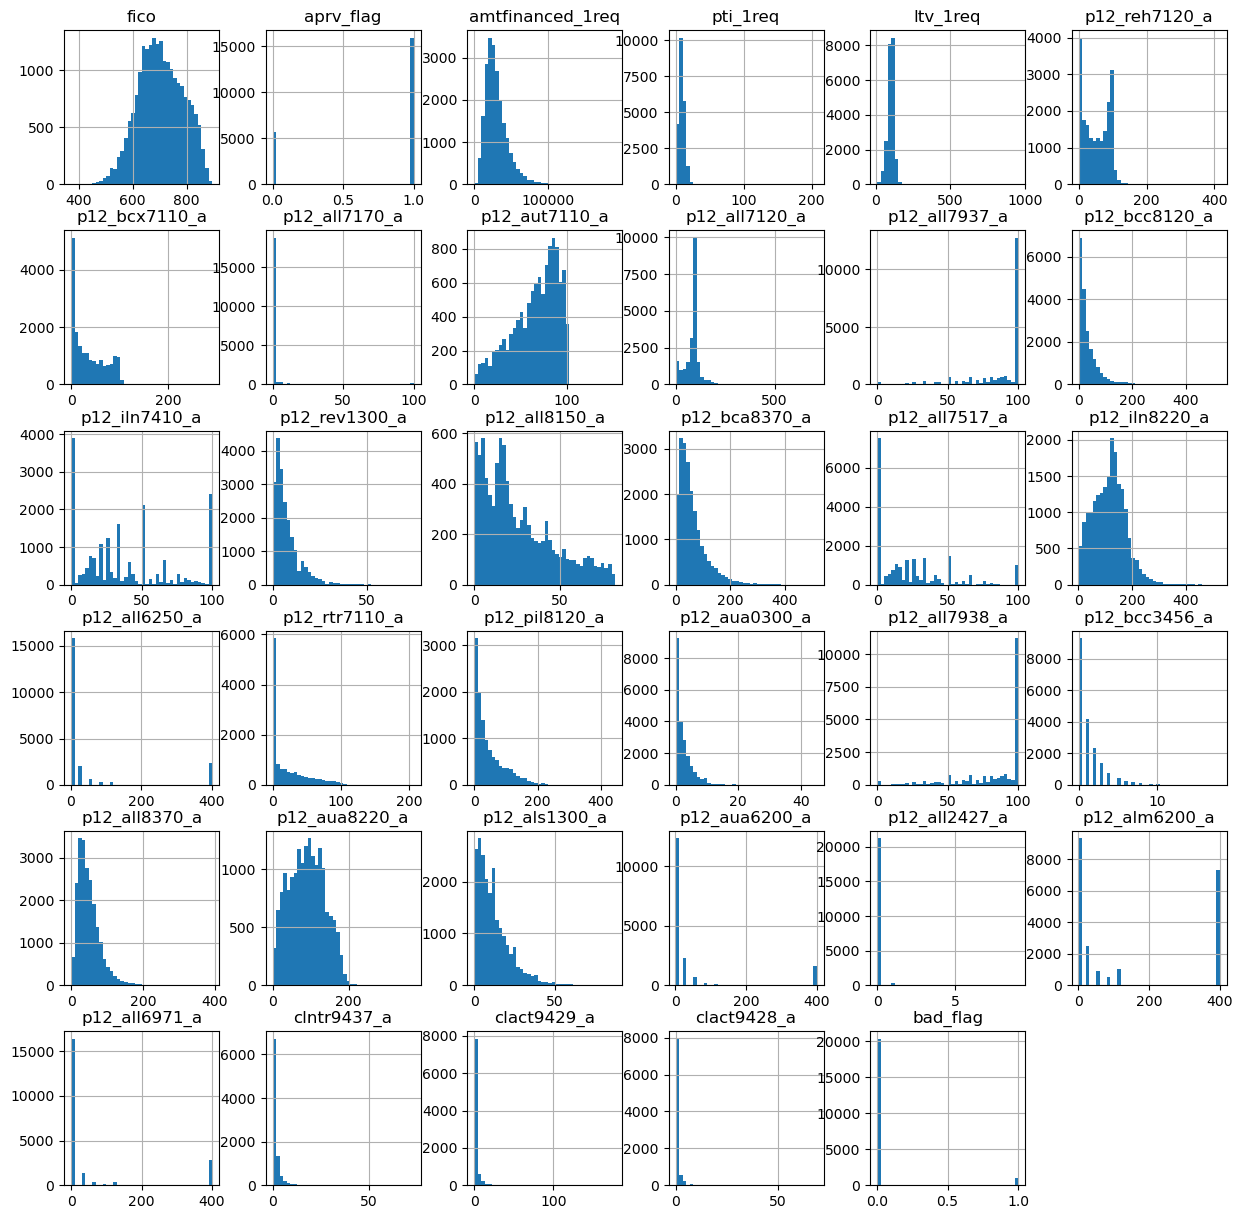

In [21]:
train_df1.hist(bins=40 , figsize=(15,15))
plt.show()

In [26]:
from sklearn.impute import SimpleImputer

# Drop rows where 'bad_flag' is missing for training data
train_df1 = train_df1.dropna(subset=['bad_flag'])

# test_df = test_df.dropna(subset=['bad_flag'])  # Uncomment if you want to drop rows from test set as well

# Identify numerical columns (excluding 'bad_flag' and 'aprv_flag')
num_cols = train_df1.select_dtypes(include=['number']).columns.drop(['bad_flag', 'aprv_flag'])

# Clean column names by removing leading/trailing spaces
train_df1.columns = train_df1.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Print the available columns to verify
print("Train columns:", train_df1.columns.tolist())
print("Test columns:", test_df.columns.tolist())

# Manually specify categorical columns (excluding 'Gender' and 'Race')
manual_cat_cols = ['collateral_dlrinput_newused_1req']  

# Auto-detect other categorical columns
cat_cols = train_df1.select_dtypes(include=['object']).columns

# Combine manually specified categorical columns with auto-detected ones
cat_cols = list(set(cat_cols) | set(manual_cat_cols))

# Exclude 'bad_flag' and 'aprv_flag' from the categorical list, but keep 'Gender' and 'Race'
cat_cols = [col for col in cat_cols if col not in ['bad_flag', 'aprv_flag']]

# Debugging: Check the categorical columns that will be imputed
print(f"Categorical columns before imputation: {cat_cols}")
if len(cat_cols) == 0:
    raise ValueError("No categorical columns found after excluding 'bad_flag', 'aprv_flag', 'Gender', and 'Race'.")

# Impute categorical features using SimpleImputer (most frequent strategy)
cat_imputer = SimpleImputer(strategy="most_frequent")

# Impute the categorical columns in train and test data
train_df1[cat_cols] = cat_imputer.fit_transform(train_df1[cat_cols])
test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

# Impute numerical features using SimpleImputer (mean strategy)
num_imputer = SimpleImputer(strategy="mean")

# Impute the numerical columns in train and test data
train_df1[num_cols] = num_imputer.fit_transform(train_df1[num_cols])
test_df[num_cols] = num_imputer.transform(test_df[num_cols])

# Check the resulting DataFrame to verify imputation
print("Train DataFrame after imputation:")
print(train_df1.head())
print("Test DataFrame after imputation:")
print(test_df.head())


# Debugging: Check for NaNs in categorical columns before encoding
print("NaNs in categorical columns before encoding (train_df):")
print(train_df[cat_cols].isna().sum())

print("NaNs in categorical columns before encoding (test_df):")
print(test_df[cat_cols].isna().sum())

# Debugging: Check for NaNs in numerical columns before encoding
print("NaNs in numerical columns before encoding (train_df):")
print(train_df[num_cols].isna().sum())

print("NaNs in numerical columns before encoding (test_df):")
print(test_df[num_cols].isna().sum())

train_df.head()

Train columns: ['fico', 'aprv_flag', 'amtfinanced_1req', 'collateral_dlrinput_newused_1req', 'pti_1req', 'ltv_1req', 'p12_reh7120_a', 'p12_bcx7110_a', 'p12_all7170_a', 'p12_aut7110_a', 'p12_all7120_a', 'p12_all7937_a', 'p12_bcc8120_a', 'p12_iln7410_a', 'p12_rev1300_a', 'p12_all8150_a', 'p12_bca8370_a', 'p12_all7517_a', 'p12_iln8220_a', 'p12_all6250_a', 'p12_rtr7110_a', 'p12_pil8120_a', 'p12_aua0300_a', 'p12_all7938_a', 'p12_bcc3456_a', 'p12_all8370_a', 'p12_aua8220_a', 'p12_als1300_a', 'p12_aua6200_a', 'p12_all2427_a', 'p12_alm6200_a', 'p12_all6971_a', 'clntr9437_a', 'clact9429_a', 'clact9428_a', 'bad_flag', 'Gender', 'Race']
Test columns: ['fico', 'aprv_flag', 'amtfinanced_1req', 'collateral_dlrinput_newused_1req', 'pti_1req', 'ltv_1req', 'p12_reh7120_a', 'p12_bcx7110_a', 'p12_all7170_a', 'p12_aut7110_a', 'p12_all7120_a', 'p12_all7937_a', 'p12_bcc8120_a', 'p12_iln7410_a', 'p12_rev1300_a', 'p12_all8150_a', 'p12_bca8370_a', 'p12_all7517_a', 'p12_iln8220_a', 'p12_all6250_a', 'p12_aua8151

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,clntr9437_a,clact9429_a,clall5010_a,clall2434_a,cloil0214_a,cltra4405_a,clact9428_a,bad_flag,Gender,Race
0,581.0,0,32115.0,NEW,15.29,105.30,72.000000,72.000000,3.0,84.000000,...,1.365325,2.216004,2412.899012,0.018625,0.222222,0.016883,0.601733,0.0,Female,White
1,707.0,1,21436.0,USED,4.63,102.12,100.000000,84.000000,0.0,66.192054,...,1.365325,2.216004,2412.899012,0.018625,0.222222,0.016883,0.601733,0.0,Male,White
2,689.0,0,26930.0,USED,6.61,109.24,76.000000,13.000000,0.0,66.192054,...,1.365325,2.216004,2412.899012,0.018625,0.222222,0.016883,0.601733,0.0,Undefined,White
3,811.0,1,18140.0,USED,3.08,49.03,12.000000,12.000000,0.0,34.000000,...,1.365325,2.216004,2412.899012,0.018625,0.222222,0.016883,0.601733,0.0,Female,Other
4,631.0,0,9874.0,USED,2.62,140.56,51.688154,35.637896,0.0,66.192054,...,7.000000,21.000000,2412.899012,0.018625,0.222222,0.016883,5.000000,0.0,Male,White


/var/folders/7y/sv20nt8s23xd99h882jm5z4c0000gs/T/ipykernel_29137/2699643847.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))
/var/folders/7y/sv20nt8s23xd99h882jm5z4c0000gs/T/ipykernel_29137/2699643847.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train_df1, x= predictor , hue= 'bad_flag', fill = True , alpha =0.3)


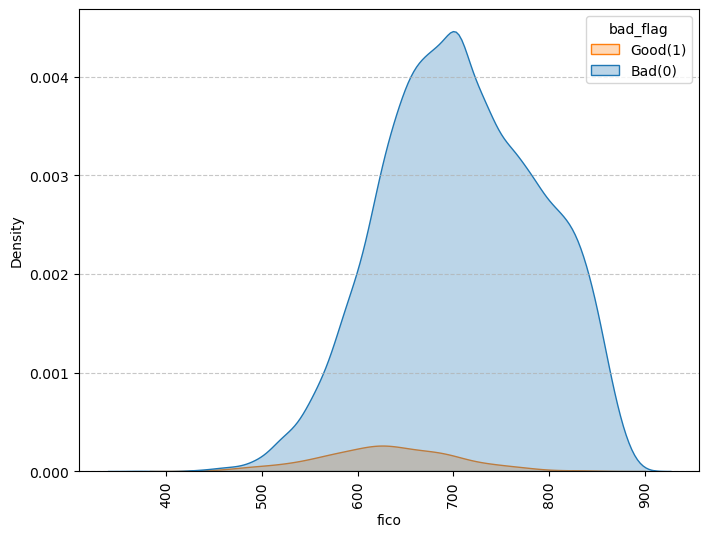

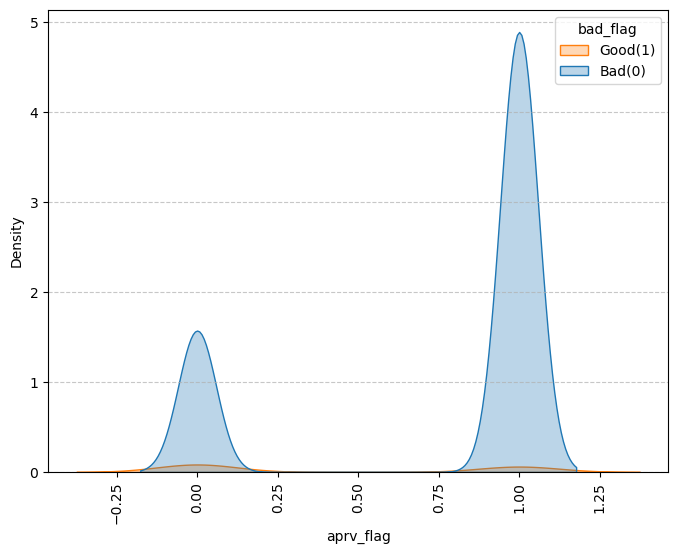

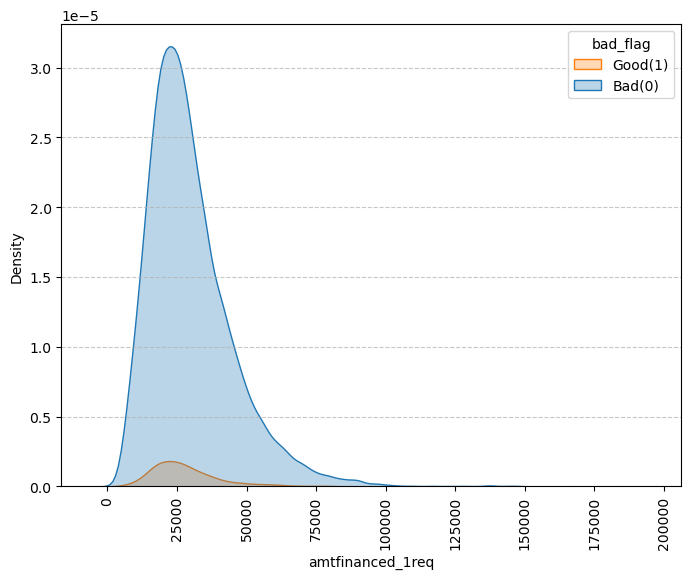

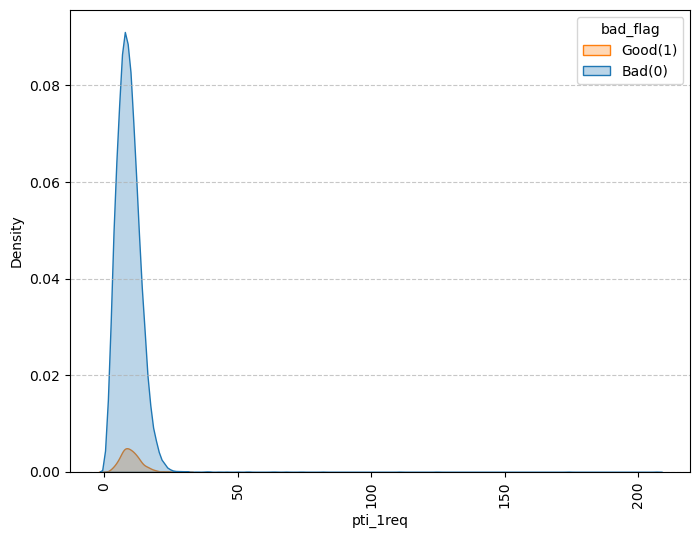

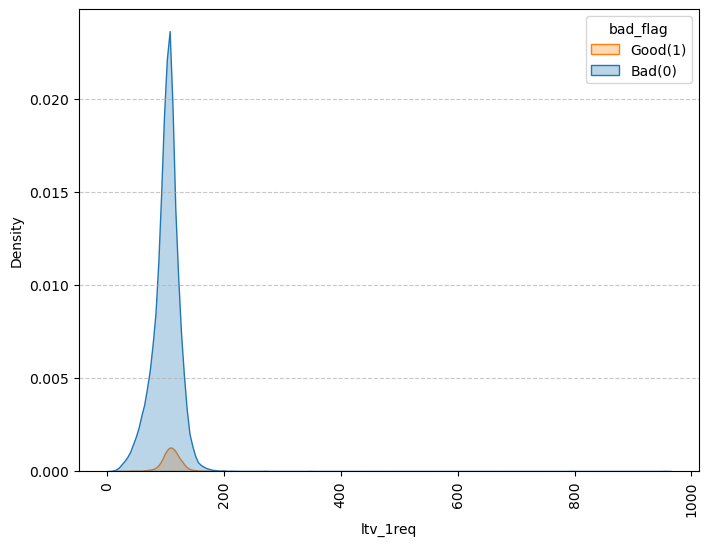

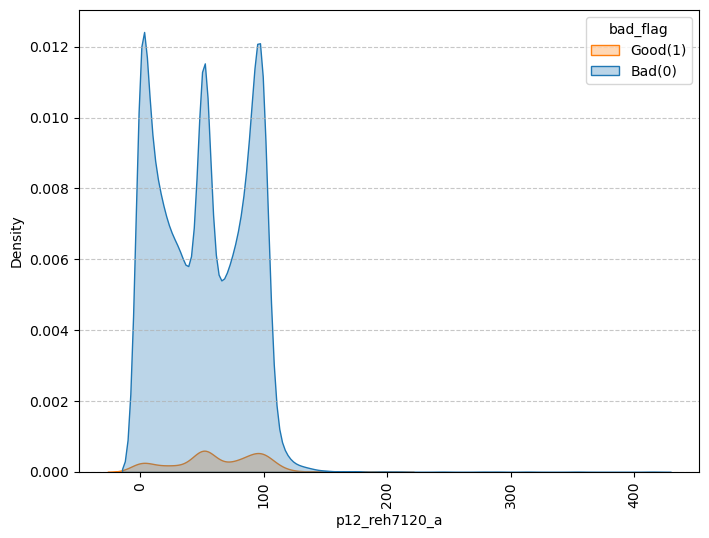

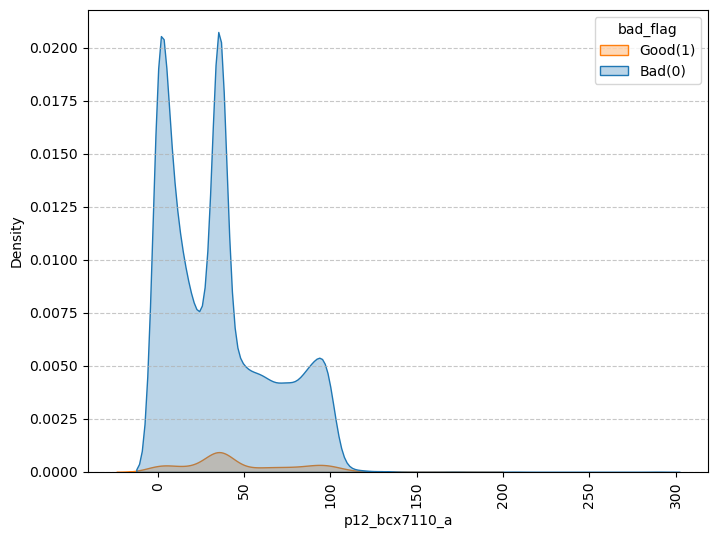

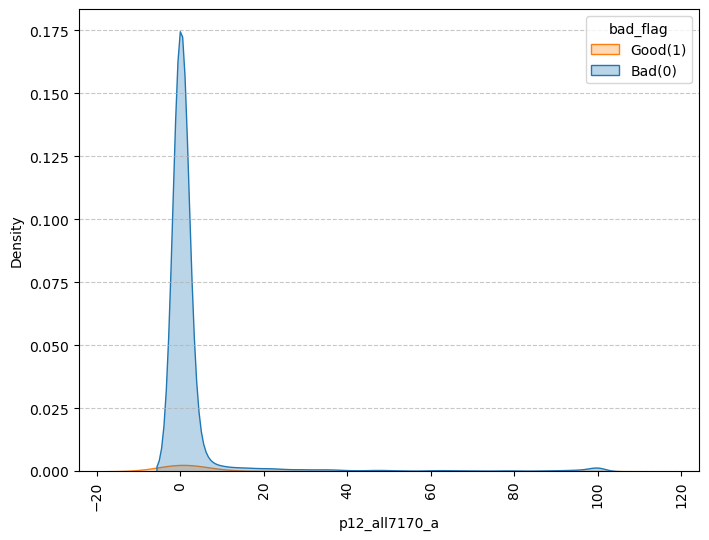

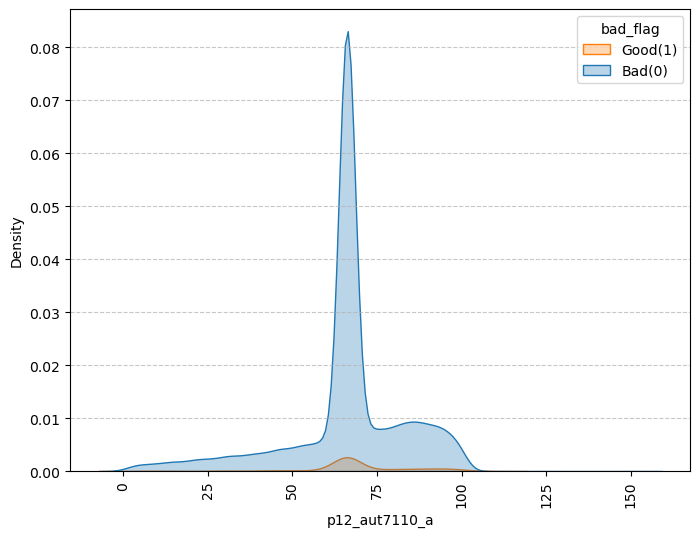

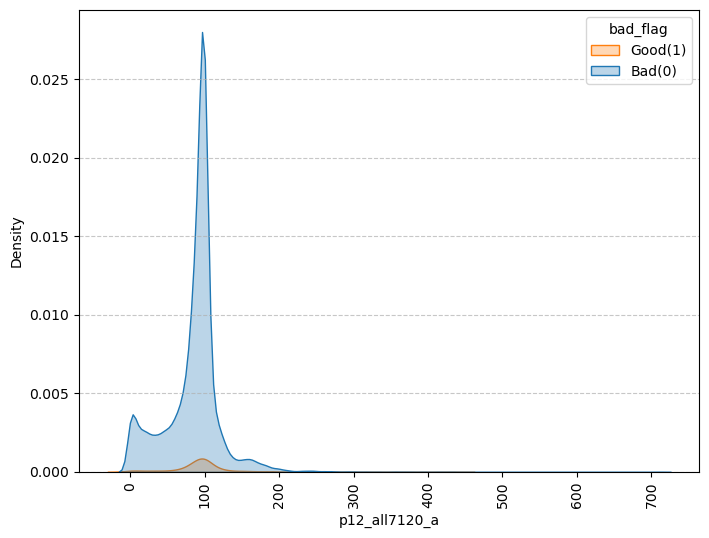

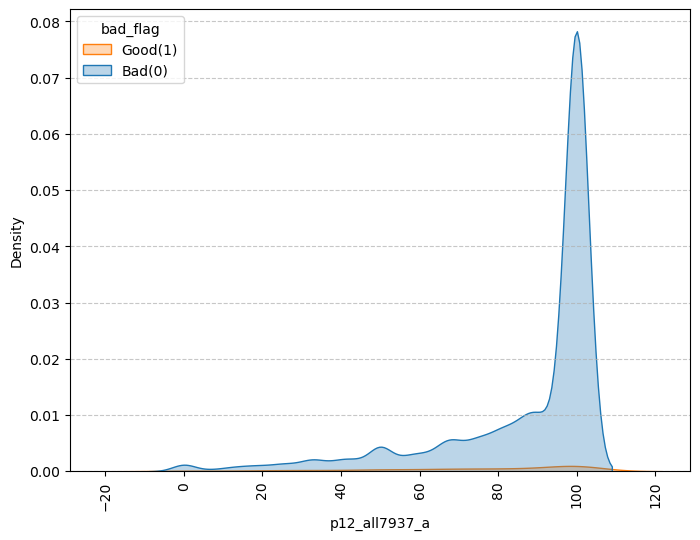

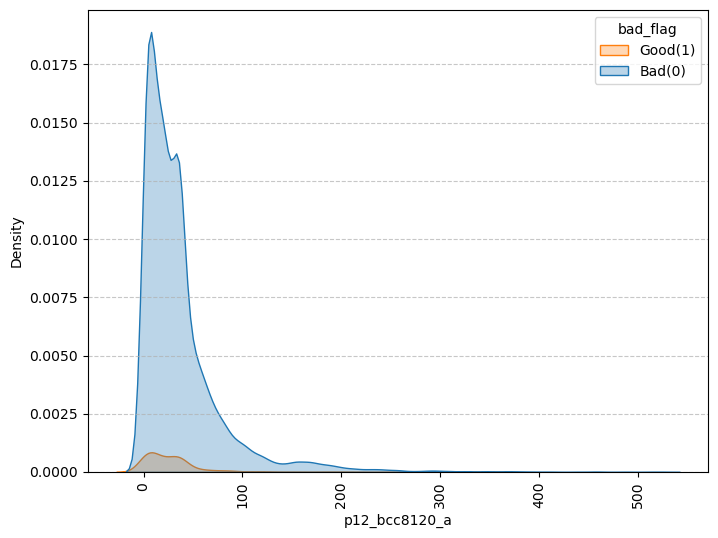

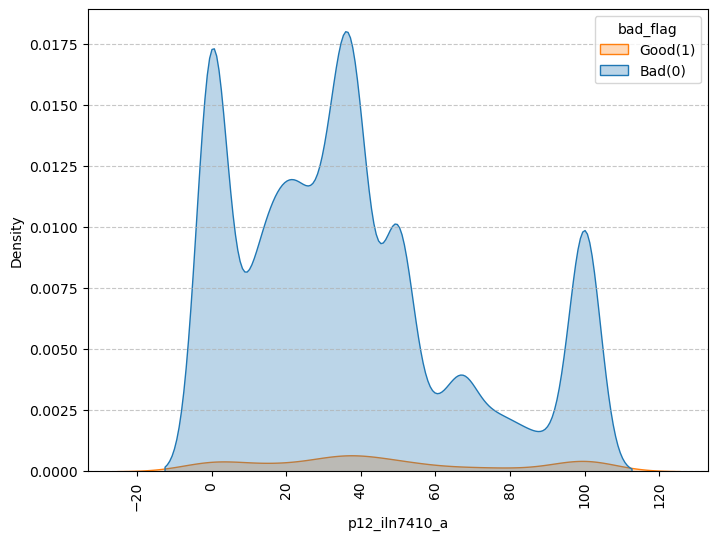

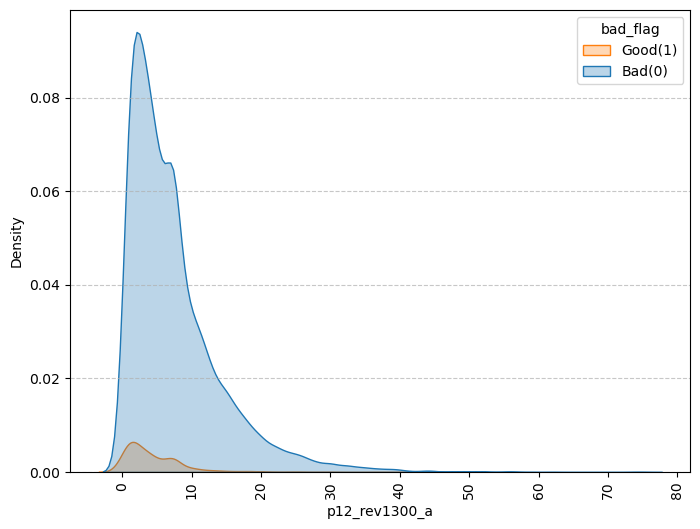

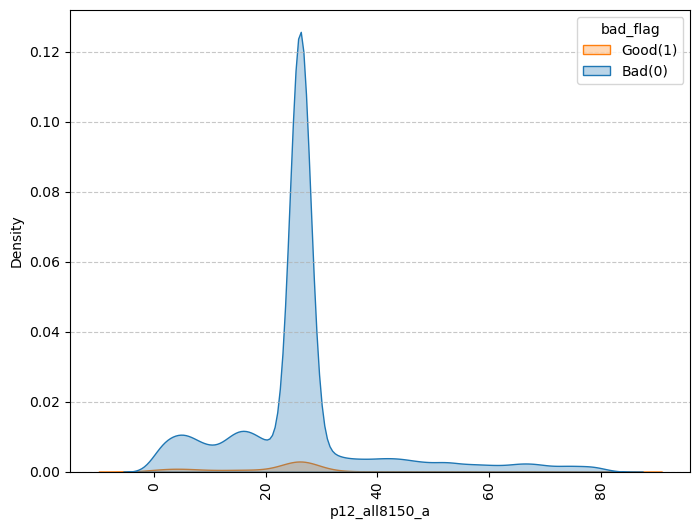

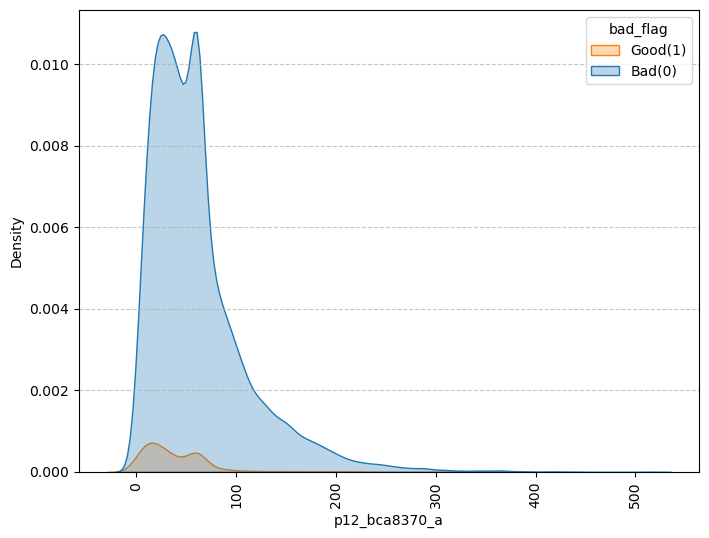

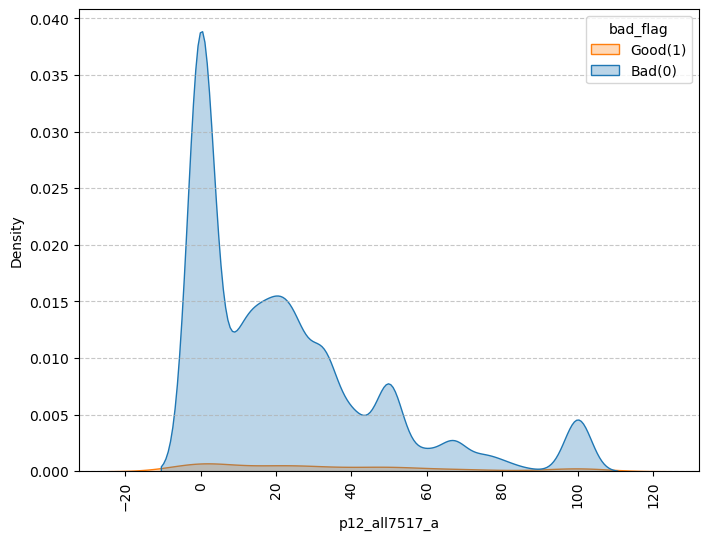

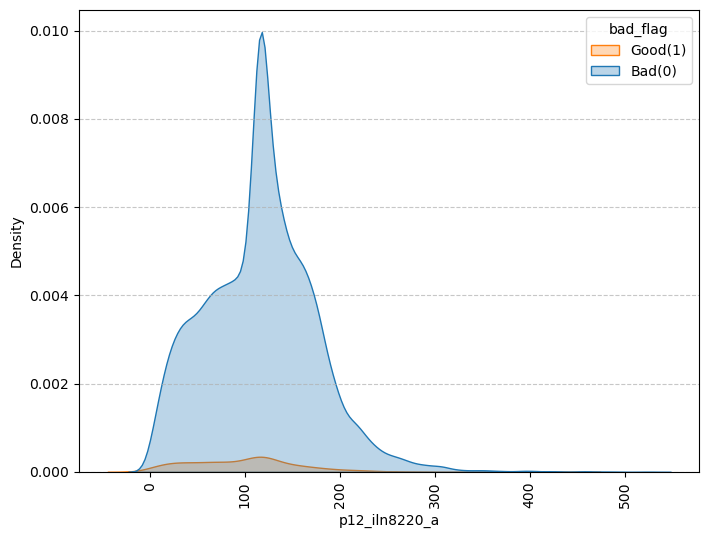

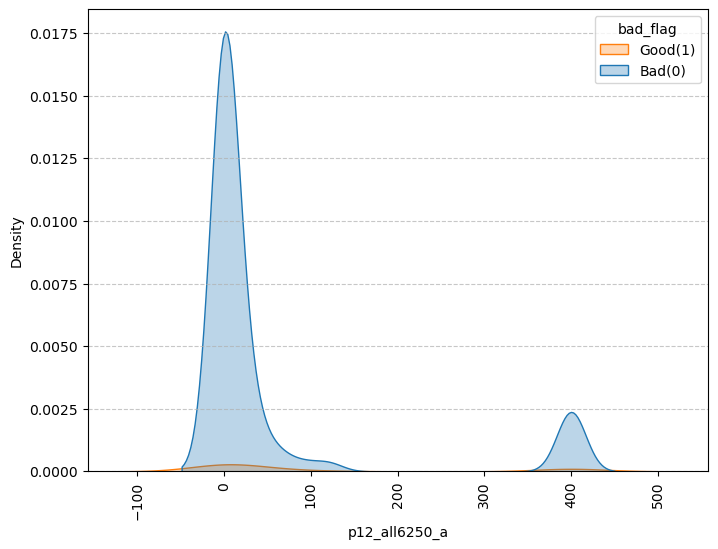

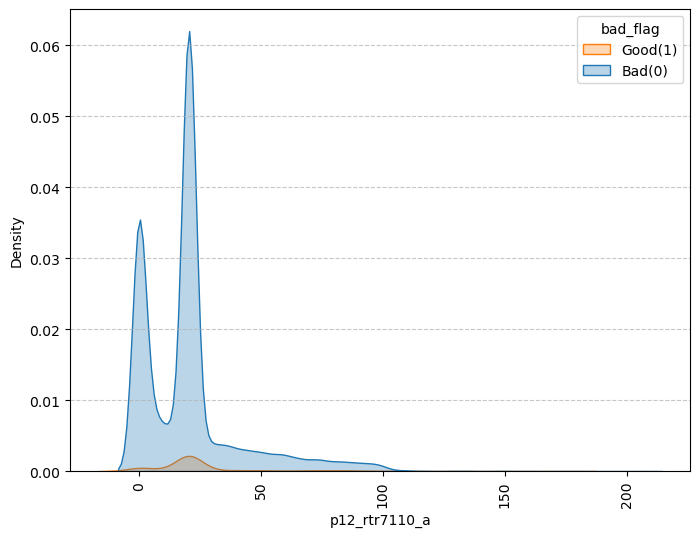

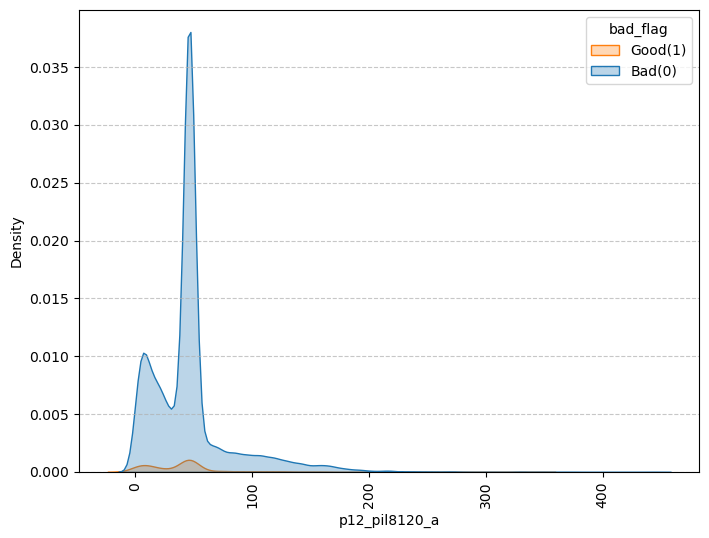

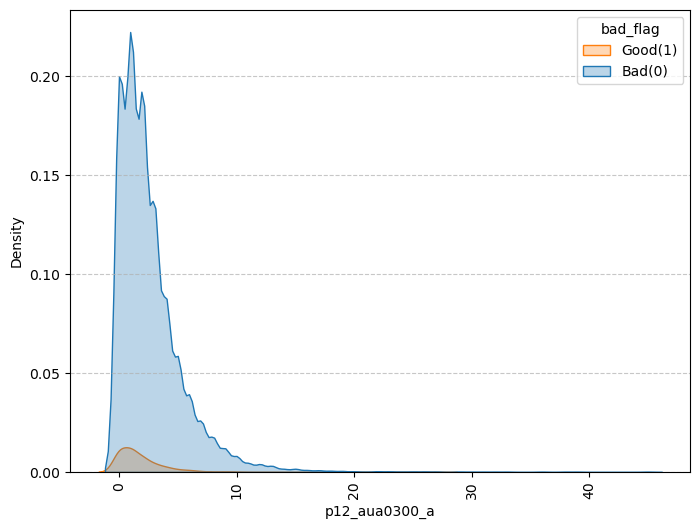

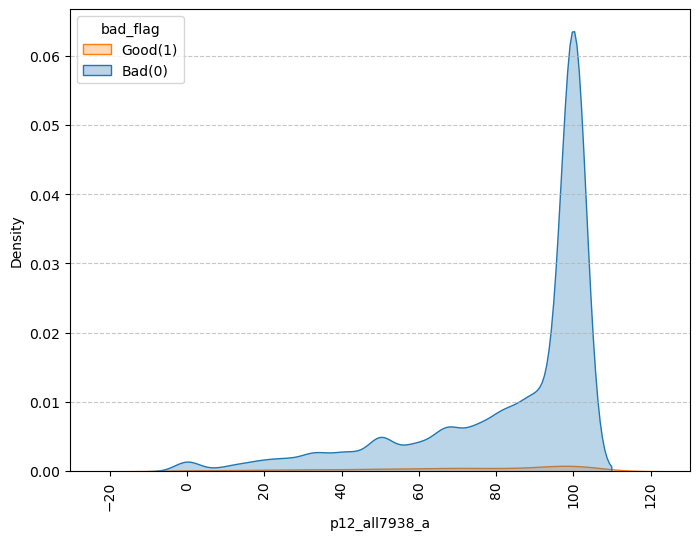

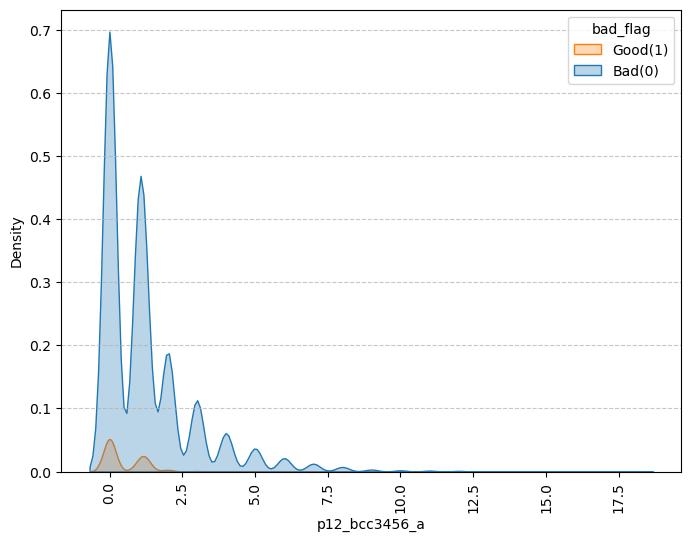

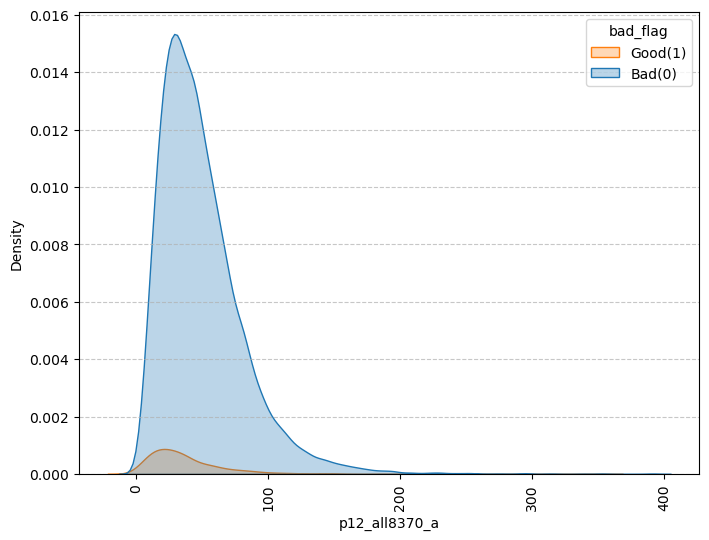

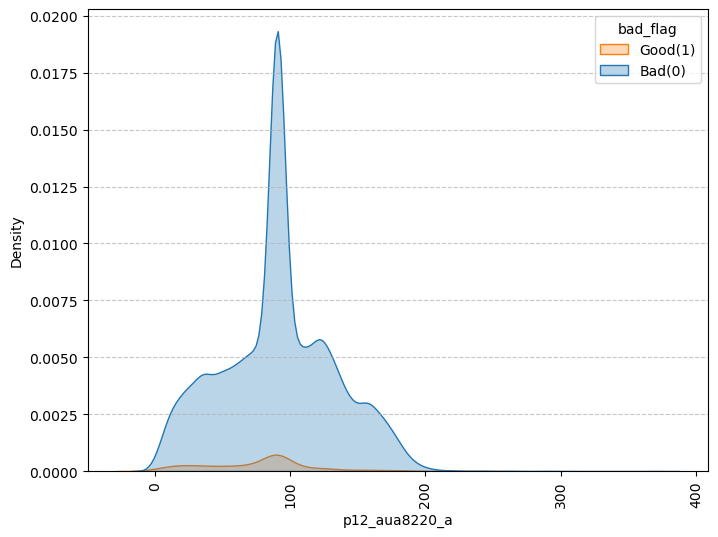

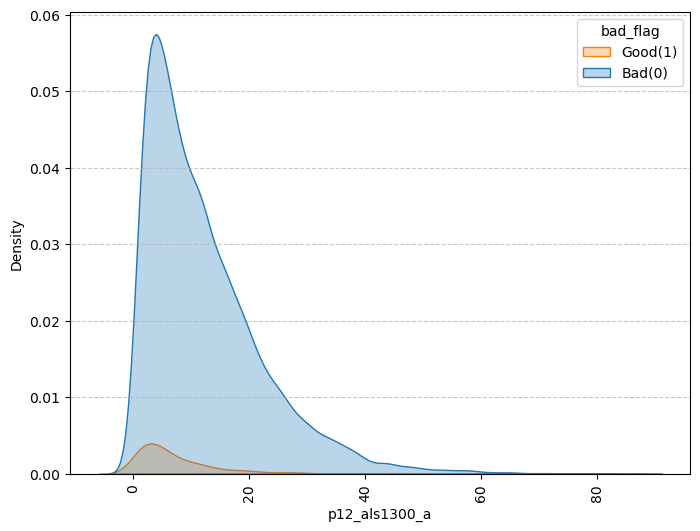

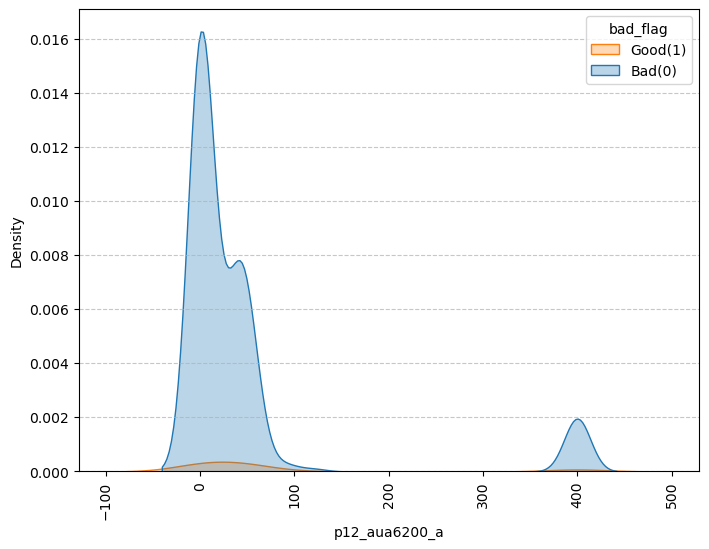

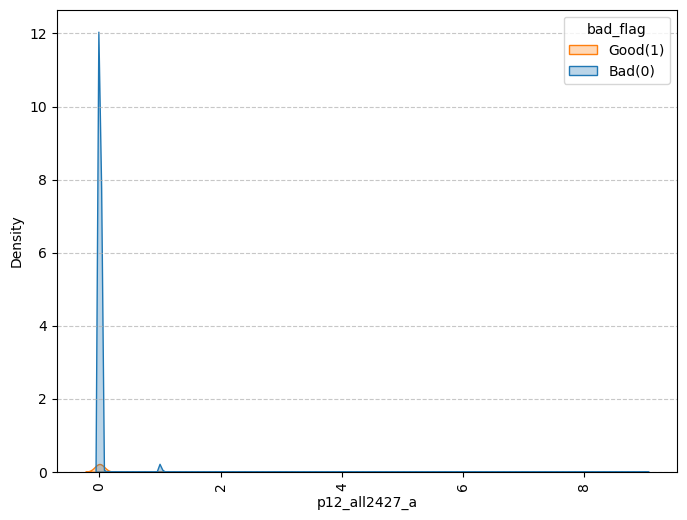

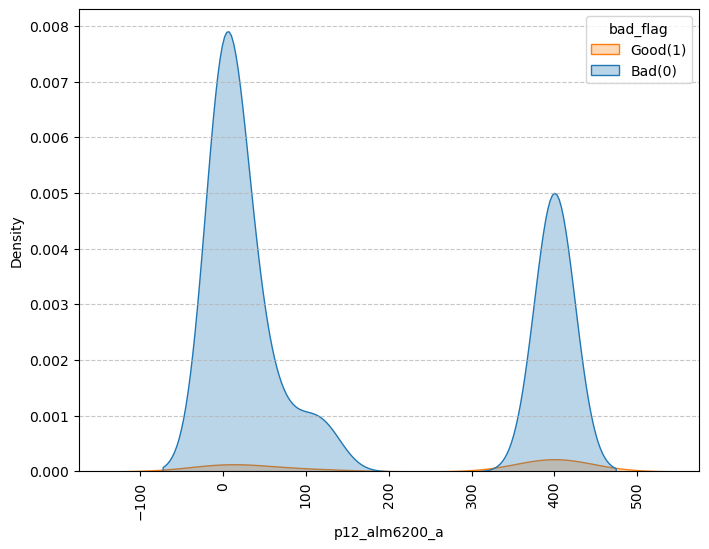

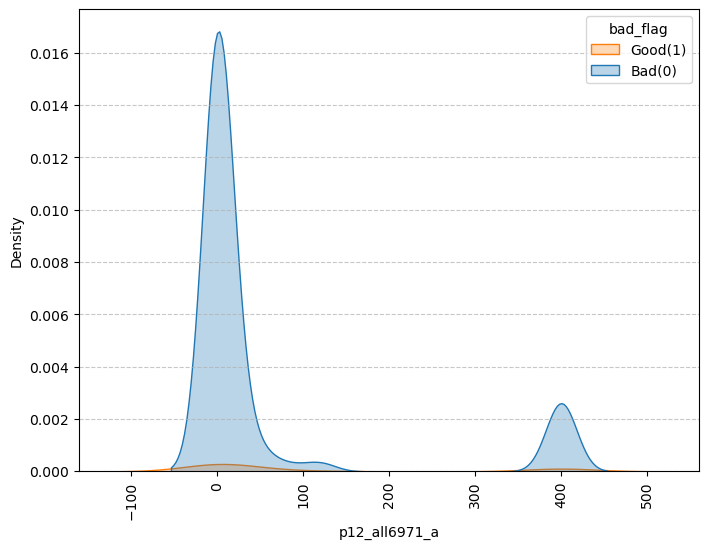

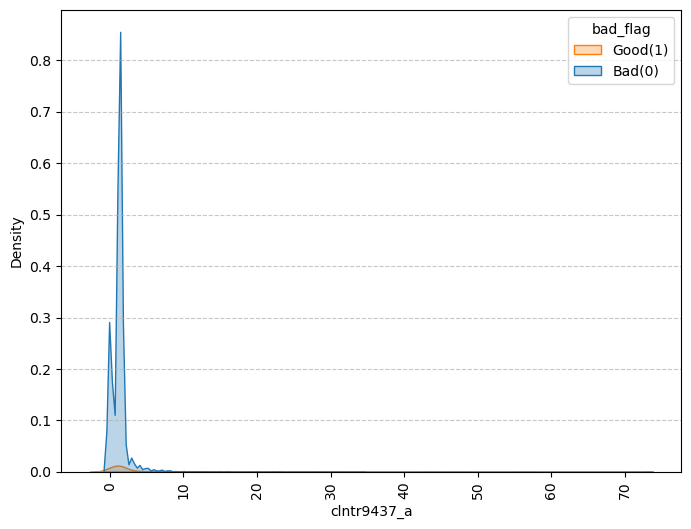

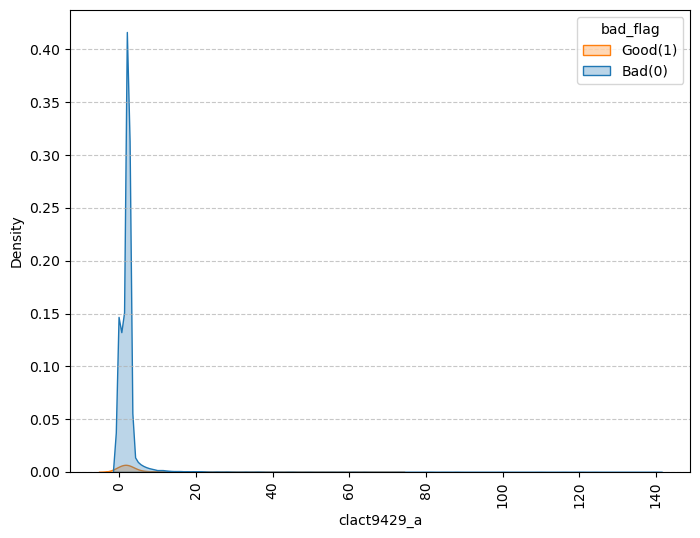

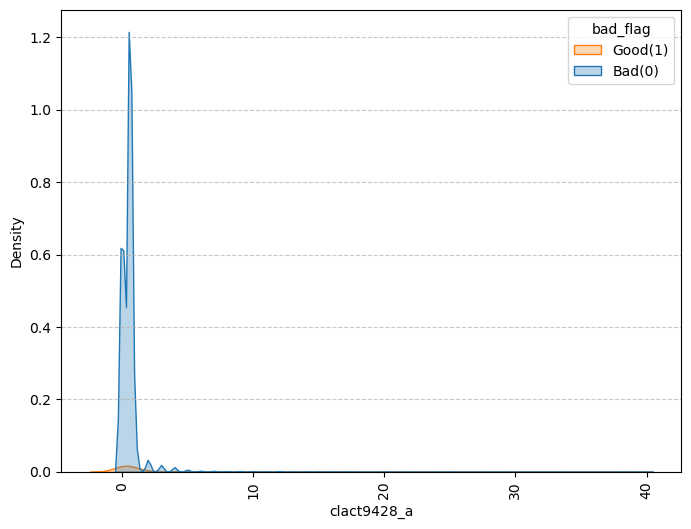

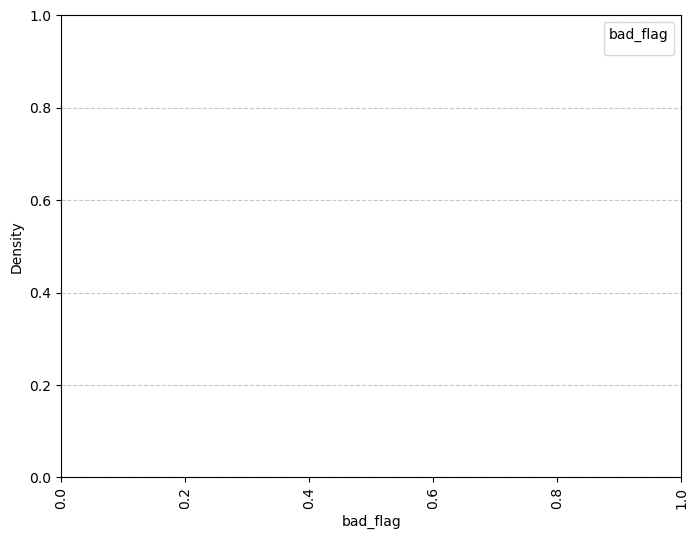

In [27]:
# Check the plot between the response and the other predictors using KDE plot 
# One plot shows the distribution of predictor's values for good performers (bad_flag=1) and another curve for bad performers (bad_flag=0)
numerical_predictors = train_df1.select_dtypes(include = ['float64', 'int64']).columns.tolist()
for predictor in numerical_predictors:
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=train_df1, x= predictor , hue= 'bad_flag', fill = True , alpha =0.3) 
    plt.title('')
    plt.xlabel(predictor) # Represents value of the predictor 
    plt.ylabel('Density') # Represnets the probability density function
    plt.xticks(rotation=90)
    plt.grid(axis='y',linestyle= '--', alpha=0.7)
    plt.legend(title ='bad_flag', labels = ['Good(1)', 'Bad(0)'])
plt.show()

                      fico  amtfinanced_1req  pti_1req  ltv_1req  \
fico              1.000000          0.072323 -0.143038 -0.221435   
amtfinanced_1req  0.072323          1.000000  0.224258  0.124855   
pti_1req         -0.143038          0.224258  1.000000  0.202772   
ltv_1req         -0.221435          0.124855  0.202772  1.000000   
p12_reh7120_a    -0.481629          0.040992  0.055048  0.170864   
p12_bcx7110_a    -0.524638         -0.016203  0.082481  0.168119   
p12_all7170_a    -0.333846         -0.071859 -0.004376  0.003175   
p12_aut7110_a    -0.076613          0.065461  0.046104  0.073273   
p12_all7120_a    -0.275929          0.098995 -0.013309  0.124811   
p12_all7937_a     0.619386          0.099426 -0.040635 -0.063000   
p12_bcc8120_a     0.135544         -0.032978 -0.058296 -0.085818   
p12_iln7410_a    -0.117245         -0.032099  0.076697  0.100379   
p12_rev1300_a     0.279851          0.128537 -0.117161 -0.048674   
p12_all8150_a     0.205505          0.006958 -0.

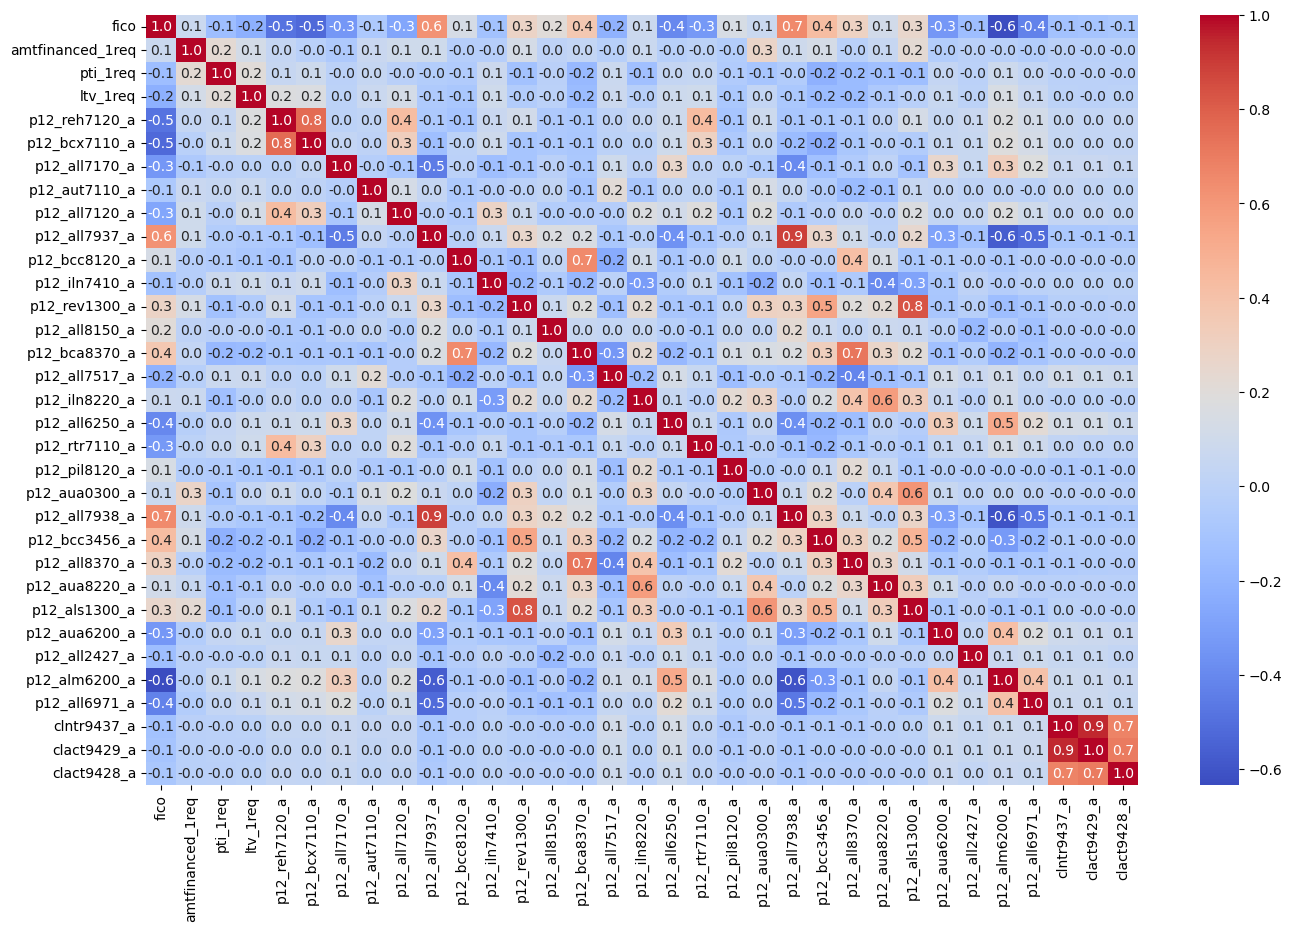

In [28]:
#Finding the Correlation matrix
categ_columns1 = ['aprv_flag', 'bad_flag', 'Gender', 'Race','collateral_dlrinput_newused_1req']
numerical_columns = train_df1.drop(columns=categ_columns1)
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

# Plotting the coorelation matrix
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm', fmt = '.1f' , cbar =True, xticklabels= correlation_matrix.columns, yticklabels = correlation_matrix.columns)
plt.title('')
plt.show()

In [29]:
# Drop the features whose coorelation > 0.8
threshold = 0.8

columns_drop = set()

# Iteration over the upper triangle 
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>=threshold:
            colname = correlation_matrix.columns[i]
            columns_drop.add(colname)
            
# Drop the coorelated columns 
train_df2 = train_df1.drop(columns= columns_drop) 
train_df2.head()


,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,p12_aua8220_a,p12_aua6200_a,p12_all2427_a,p12_alm6200_a,p12_all6971_a,clntr9437_a,clact9428_a,bad_flag,Gender,Race
0,581.0,0,32115.0,NEW,15.29,105.30,72.000000,72.000000,3.0,84.000000,...,65.000000,1.000000,0.0,400.0,400.0,1.365325,0.601733,0.0,Female,White
1,707.0,1,21436.0,USED,4.63,102.12,100.000000,84.000000,0.0,66.192054,...,90.454958,45.995817,0.0,1.0,1.0,1.365325,0.601733,0.0,Male,White
2,689.0,0,26930.0,USED,6.61,109.24,76.000000,13.000000,0.0,66.192054,...,90.454958,45.995817,0.0,90.0,1.0,1.365325,0.601733,0.0,Undefined,White
3,811.0,1,18140.0,USED,3.08,49.03,12.000000,12.000000,0.0,34.000000,...,49.000000,1.000000,0.0,1.0,1.0,1.365325,0.601733,0.0,Female,Other
4,631.0,0,9874.0,USED,2.62,140.56,51.688154,35.637896,0.0,66.192054,...,128.000000,400.000000,0.0,400.0,90.0,7.000000,5.000000,0.0,Male,White


In [30]:
print(columns_drop)

{'p12_all7938_a', 'clact9429_a', 'p12_als1300_a'}


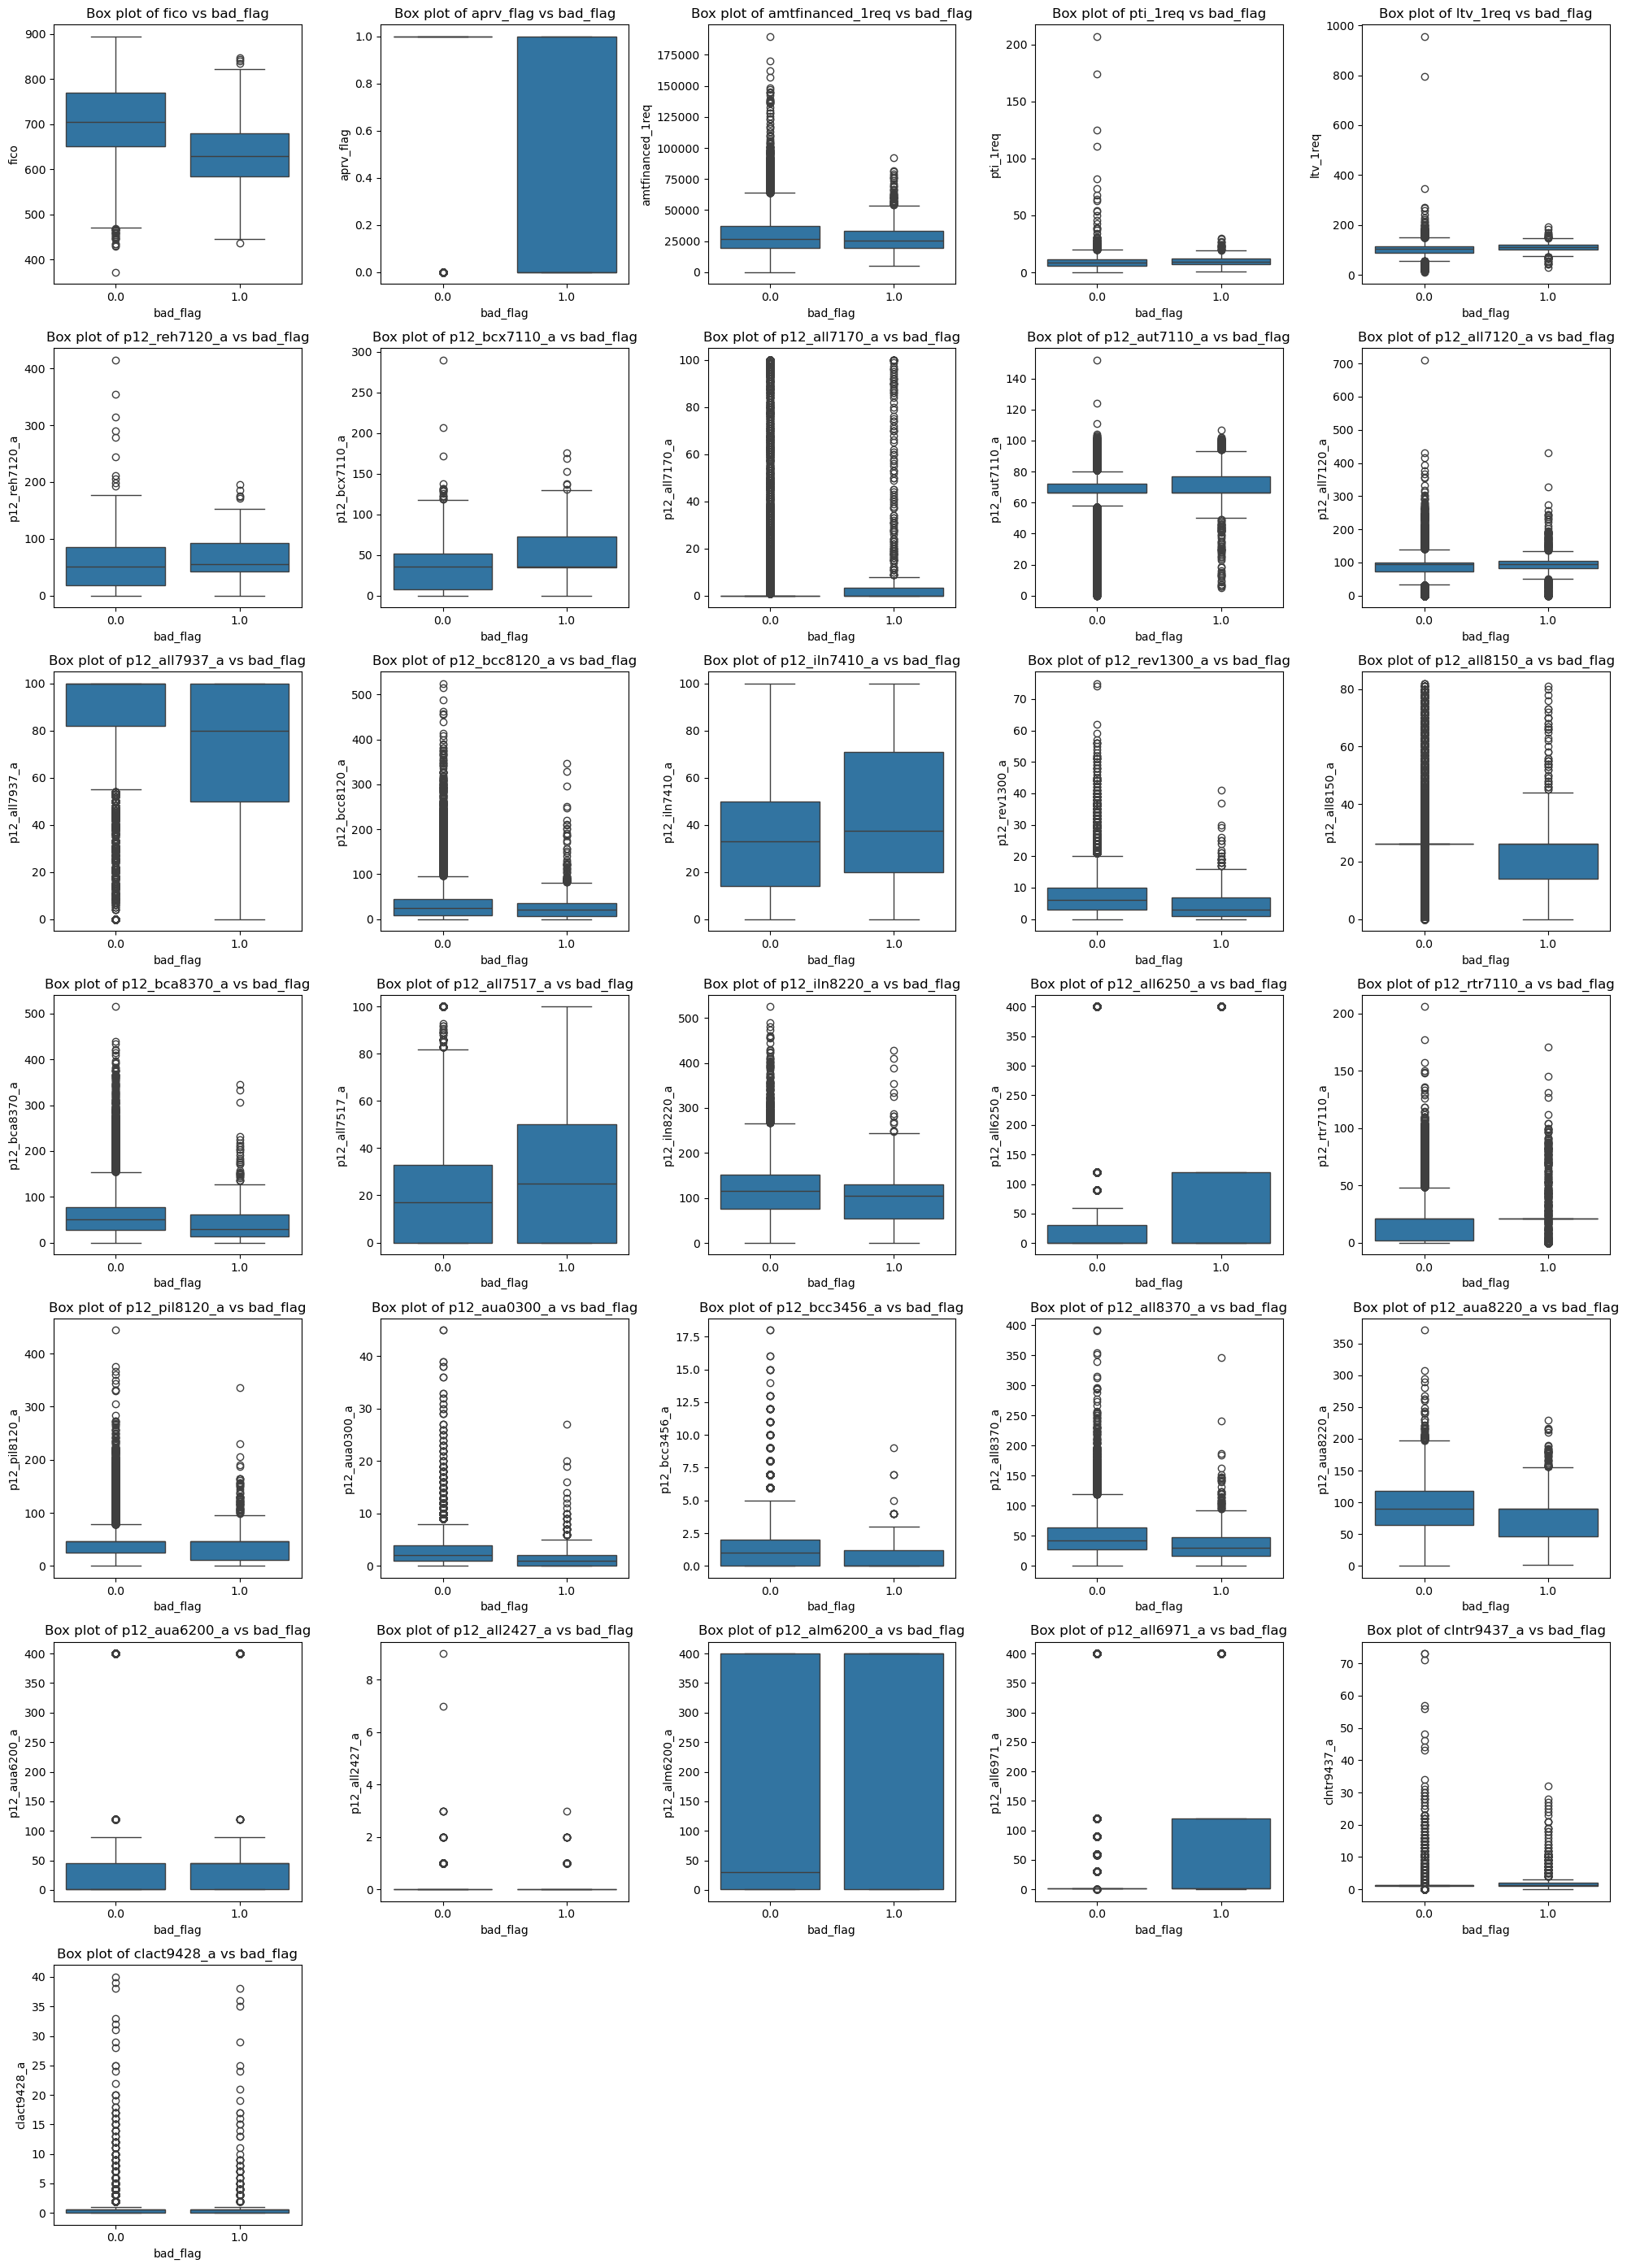

In [31]:
# List of numerical columns (excluding 'bad_flag')
num_cols = [col for col in train_df2.columns if col != 'bad_flag' and train_df[col].dtype in ['int64', 'float64']]

# Calculate the number of rows and columns needed for the grid
n_cols = 5  # You can adjust this number as needed
n_rows = int(np.ceil(len(num_cols) / n_cols))  # Calculate number of rows

# Set up the matplotlib figure
plt.figure(figsize=(n_cols * 4, n_rows * 4))  # Adjust the size to accommodate all plots

# Create box plots for each numerical column against 'bad_flag'
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust grid size based on n_rows and n_cols
    sns.boxplot(x='bad_flag', y=col, data=train_df2)
    plt.title(f'Box plot of {col} vs bad_flag')

plt.tight_layout()  
plt.show()

In [32]:
# Define features and target, making sure to exclude 'aprv_flag' and 'bad_flag'
X_train = train_df2.drop(columns=['bad_flag', 'aprv_flag'])
y_train = train_df2['bad_flag']
X_test = test_df.drop(columns=['bad_flag', 'aprv_flag'])
y_test = test_df['bad_flag']

# Recompute numerical columns 
num_cols = X_train.select_dtypes(include=['number']).columns

# Apply RobustScaler to numerical features only
scaler = RobustScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Final dataset shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (21348, 33), y_train shape: (21348,)
X_test shape: (5400, 41), y_test shape: (5400,)


In [33]:
# One-hot encoding of categorical columns
training_encoded = pd.get_dummies(train_df2, columns=['collateral_dlrinput_newused_1req', 'Gender', 'Race'], drop_first=False)

# Convert the newly created dummy columns to int type
dummy_columns = training_encoded.columns.difference(train_df2.columns)
training_encoded[dummy_columns] = training_encoded[dummy_columns].astype(int)

# Display the first few rows of the encoded DataFrame
training_encoded.head()

,fico,aprv_flag,amtfinanced_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,p12_all7120_a,...,collateral_dlrinput_newused_1req_NEW,collateral_dlrinput_newused_1req_USED,Gender_Female,Gender_Male,Gender_Undefined,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,581.0,0,32115.0,15.29,105.30,72.000000,72.000000,3.0,84.000000,89.0,...,1,0,1,0,0,0,0,0,0,1
1,707.0,1,21436.0,4.63,102.12,100.000000,84.000000,0.0,66.192054,100.0,...,0,1,0,1,0,0,0,0,0,1
2,689.0,0,26930.0,6.61,109.24,76.000000,13.000000,0.0,66.192054,76.0,...,0,1,0,0,1,0,0,0,0,1
3,811.0,1,18140.0,3.08,49.03,12.000000,12.000000,0.0,34.000000,99.0,...,0,1,1,0,0,0,0,0,1,0
4,631.0,0,9874.0,2.62,140.56,51.688154,35.637896,0.0,66.192054,93.0,...,0,1,0,1,0,0,0,0,0,1


In [34]:
# Assuming train_df and test_df are your dataframes

#binary_categorical_cols = ['collateral_dlrinput_newused_1req']

# Label encoding for binary categorical columns
#label_enc = LabelEncoder()
#for col in binary_categorical_cols:
#    if col in train_df2.columns and col in test_df.columns:  # Ensure column exists before encoding
#        train_df2[col] = label_enc.fit_transform(train_df2[col])
#        test_df[col] = label_enc.transform(test_df[col])
#    else:
#        print(f"Warning: {col} is missing in train_df or test_df")

# Check if 'Gender' and 'Race' exist in the DataFrame before proceeding
#print("Available columns in train_df:", train_df2.columns.tolist())

# Ensure that 'Gender' and 'Race' are in the DataFrame
#multi_categorical_cols = ['Gender', 'Race']  # Multi-class categorical variables

# Check if the columns exist in train_df and test_df before encoding
#missing_cols = [col for col in multi_categorical_cols if col not in train_df2.columns]

#if missing_cols:
#    print(f"Warning: The following columns are missing in the DataFrame: {missing_cols}")
#else:
    # One-hot encode the categorical columns
#    one_hot = OneHotEncoder(sparse_output=False)

    # One-hot encode the categorical columns
#    encoded_multi_train = one_hot.fit_transform(train_df2[multi_categorical_cols])
#    encoded_multi_test = one_hot.transform(test_df[multi_categorical_cols])

    # Convert to DataFrame and concatenate with original DataFrame
#    encoded_multi_train_df = pd.DataFrame(encoded_multi_train, columns=one_hot.get_feature_names_out(multi_categorical_cols))
#    encoded_multi_test_df = pd.DataFrame(encoded_multi_test, columns=one_hot.get_feature_names_out(multi_categorical_cols))

    # Concatenate the encoded columns back to the DataFrame
#    train_df = pd.concat([train_df2.drop(columns=multi_categorical_cols), encoded_multi_train_df], axis=1)
#    test_df = pd.concat([test_df.drop(columns=multi_categorical_cols), encoded_multi_test_df], axis=1)

# Check for NaNs after encoding
#print(f"NaNs in train_df after encoding: {train_df2.isna().sum().sum()}")
#print(f"NaNs in test_df after encoding: {test_df.isna().sum().sum()}")

# Impute missing values (NaNs) after encoding
# Option 1: Fill NaNs with 0 (or other values if needed)
#train_df2.fillna(0, inplace=True)
#test_df.fillna(0, inplace=True)

# Check for NaNs after imputation
#print(f"NaNs in train_df after imputation: {train_df.isna().sum().sum()}")
#print(f"NaNs in test_df after imputation: {test_df.isna().sum().sum()}")


In [35]:
# Split the data into train and test
X= training_encoded.drop(columns = 'bad_flag')
y = training_encoded['bad_flag'].astype(int)

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2, random_state= 60)